In [1]:
# Load up diamonds data set
library(ggplot2)

# view rows and columns
dim(diamonds) 

[1] 53940    10

In [2]:
# look at some rows
head(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [3]:
# make factors into bit fields

library(dplyr, warn.conflicts = FALSE)

diamonds <- mutate(diamonds,
      fair_cut = ifelse(cut == 'Fair', 1, 0),
      good_cut = ifelse(cut == 'Good', 1, 0),
      vgood_cut = ifelse(cut == 'Very Good', 1, 0),
      prem_cut = ifelse(cut == 'Premium', 1, 0),
      ideal_cut = ifelse(cut == 'Ideal', 1, 0)
)

head(select(diamonds, -c(1,3:10)))

,cut,fair_cut,good_cut,vgood_cut,prem_cut,ideal_cut
1,Ideal,0,0,0,0,1
2,Premium,0,0,0,1,0
3,Good,0,1,0,0,0
4,Premium,0,0,0,1,0
5,Good,0,1,0,0,0
6,Very Good,0,0,1,0,0


In [4]:
# make more factors into bit fields

diamonds <- mutate(diamonds,
    D = ifelse(color == 'D', 1, 0),
    E = ifelse(color == 'E', 1, 0),
    F = ifelse(color == 'F', 1, 0),
    G = ifelse(color == 'G', 1, 0),
    H = ifelse(color == 'H', 1, 0),
    I = ifelse(color == 'I', 1, 0),
    J = ifelse(color == 'J', 1, 0)
)

diamonds <- mutate(diamonds,
    I1 = ifelse(clarity == 'I1', 1, 0),
    IF = ifelse(clarity == 'IF', 1, 0),
    SI1 = ifelse(clarity == 'SI1', 1, 0),
    SI2 = ifelse(clarity == 'SI2', 1, 0),
    VS1 = ifelse(clarity == 'VS1', 1, 0),
    VS2 = ifelse(clarity == 'VS2', 1, 0),
    VVS1 = ifelse(clarity == 'VVS1', 1, 0),
    VVS2 = ifelse(clarity == 'VVS2', 1, 0)
)

dim(diamonds)

[1] 53940    30

In [5]:
# remove the factors

diamonds <- select(diamonds, -color, -cut, -clarity)

head(diamonds)

,carat,depth,table,price,x,y,z,fair_cut,good_cut,vgood_cut,ellip.h,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1,0.23,61.5,55,326,3.95,3.98,2.43,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61,326,3.89,3.84,2.31,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65,327,4.05,4.07,2.31,0,1,0,⋯,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58,334,4.2,4.23,2.63,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58,335,4.34,4.35,2.75,0,1,0,⋯,0,1,0,0,0,1,0,0,0,0
6,0.24,62.8,57,336,3.94,3.96,2.48,0,0,1,⋯,0,1,0,0,0,0,0,0,0,1


In [6]:
# normalize the numeric numbers (non bit fields) so they are around the same scale

normalize <- function(x) {
    (x - mean(x)) / sd(x)
}

diamonds <- mutate(diamonds,
                  carat = normalize(carat),
                  depth = normalize(depth),
                  table = normalize(table),
                  x = normalize(x),
                  y = normalize(y),
                  z = normalize(z)
            )

summary(select(diamonds, carat, depth, table))

     carat             depth               table        
 Min.   :-1.2614   Min.   :-13.08748   Min.   :-6.4700  
 1st Qu.:-0.8395   1st Qu.: -0.52310   1st Qu.:-0.6521  
 Median :-0.2066   Median :  0.03532   Median :-0.2046  
 Mean   : 0.0000   Mean   :  0.00000   Mean   : 0.0000  
 3rd Qu.: 0.5107   3rd Qu.:  0.52393   3rd Qu.: 0.6905  
 Max.   : 8.8860   Max.   : 12.04128   Max.   :16.8015  

In [7]:
# randomize the order

n <- nrow(diamonds)
diamonds <- diamonds[sample(n), ]

head(diamonds)

,carat,depth,table,price,x,y,z,fair_cut,good_cut,vgood_cut,ellip.h,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1,1.924132,1.082348,-1.99472,13152,1.612503,1.624567,1.773088,0,0,1,⋯,0,0,0,0,1,0,0,0,0,0
2,-0.7762258,1.15215,-0.6521325,894,-0.8122563,-0.8182275,-0.6925529,0,0,1,⋯,0,0,0,0,1,0,0,0,0,0
3,1.670974,0.03531645,-0.2046032,12047,1.505529,1.537011,1.518022,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
4,1.059174,0.1051186,-0.2046032,5169,1.140032,1.064213,1.107082,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
5,-1.050481,-0.243892,-0.6521325,949,-1.24907,-1.194715,-1.231026,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
6,-1.050481,0.8729419,-1.547191,878,-1.275813,-1.282271,-1.188515,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [8]:
# use 80% of data to train, 20% to test

split <- floor(n * 0.80)
train <- diamonds[1:split,]
test <- diamonds[-(1:split),]

dim(train)
dim(test)

[1] 43152    27

[1] 10788    27

In [9]:
library(xgboost, warn.conflicts = FALSE)

y = train$price
X = data.matrix(select(train, -price))

# train
model = xgboost(data = X, 
                label = y,
                nthread = 4,
                max.depth = 25,
                alpha = 1.5,
                lambda = 1.5,
                nrounds = 200,
                eval_metric = "rmse",
                objective = "reg:linear",
                verbose = 0)

# predict
test$predicted <- round(xgboost::predict(model, data.matrix(test)), 0)


# show a sample
select(test, price, predicted) %>%
   sample_n(10)

,price,predicted
1,2386,1970
2,4414,6814
3,3629,2428
4,1786,3002
5,4440,3640
6,5866,4658
7,789,1001
8,5351,3803
9,7637,7610
10,9974,10655


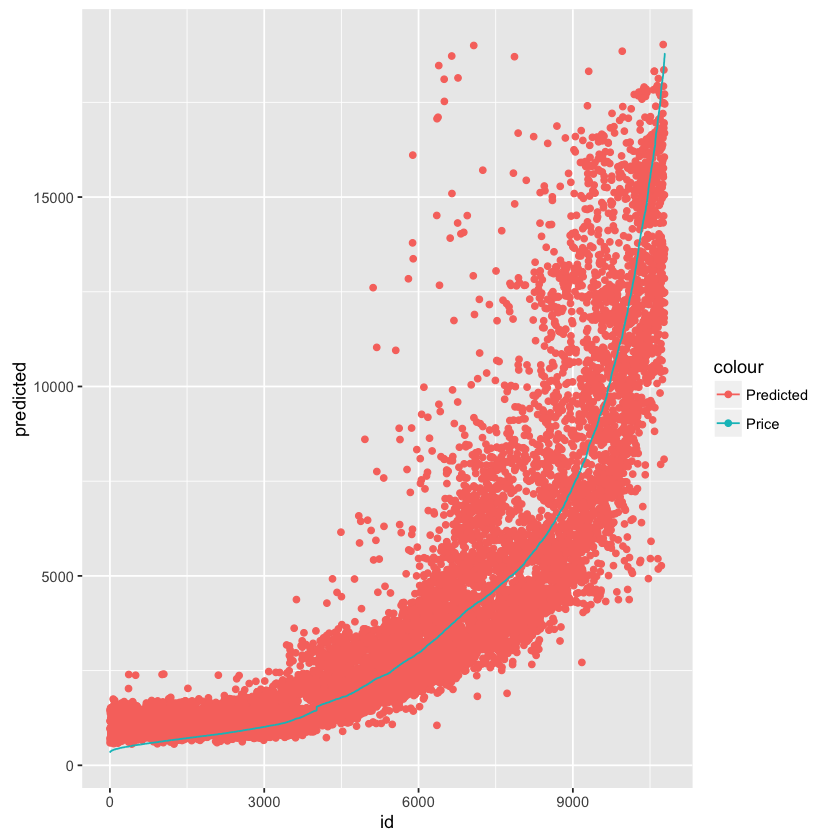

In [10]:
# print predicted(dots) against prices (sorted by price)

for_graph <- arrange(test, price) %>%
    select(price, predicted) %>%
    mutate(id = seq.int(nrow(test)))

options(jupyter.plot_mimetypes = 'image/png')
graph <- ggplot(data = for_graph, aes(x = id)) +
           geom_point(aes(y = predicted, color = "Predicted")) + 
           geom_line(aes(y = price, color = "Price"))
print(graph)

In [24]:
# try regular linear regression

# Warning: COST OR GRADIENT MAY BE INCORRECT HERE
library(functional)

lambda <- 1

cost <- function(theta, X, y, lambda) {
    vals <- X %*% theta
    sum((vals - y) ^ 2) / (2 * nrow(X)) +
      ((lambda / nrow(X)) * sum(theta[2:length(theta)] ^ 2))
}

cost_wrapper <- Curry(cost, X = X, lambda = lambda)

grad <- function(theta, X, y, alpha) {
    vals <- X %*% theta
    theta - ((alpha / nrow(X)) * (t(X) %*% (vals - y))) 
}

grad_wrapper <- Curry(grad, X = X, lambda = lambda)

model <- optim(par = rep(0, length(X[1,])),
               fn = cost_wrapper,
               gr = grad_wrapper,
               y = y,
               control = list(maxit = 1000,
                              alpha = 1))

model$par

[1]  40.9151233 -25.1423928   4.0384296  49.0145553  43.9465612 -10.3157471
 [7]  -9.6296119 -11.3535260 -81.2801477  -3.7130290  28.6772685  14.6732925
[13]  -5.8587379  -2.6503497   9.8048843  11.0038445   5.3347540  -3.9477817
[19] -23.3348060 -21.3130407  11.2400751   8.8189163   0.9583107  47.4131570
[25] -53.9277278  -1.0267073

In [25]:
# predict
test$predicted2 <- data.matrix(select(test, -price, -predicted)) %*% model$par

# show a smaple of predictions
select(test, price, predicted2) %>%
   sample_n(10)


ERROR: Error in data.matrix(select(test, -price, -predicted)) %*% model$par: non-conformable arguments


,price,predicted2
1,2549,-117.9141
2,434,-2273.846
3,5385,4577.663
4,8954,8709.418
5,12696,3597.621
6,3920,614.141
7,781,-311.0816
8,9254,-287.6677
9,10055,2909.327
10,5982,7379.677


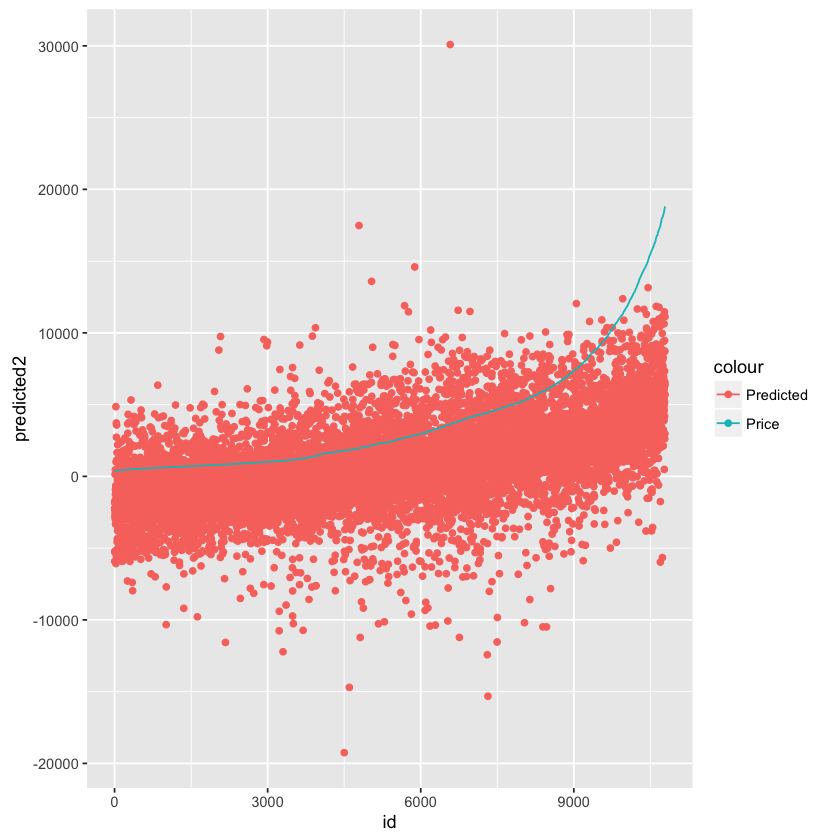

In [26]:
# print predicted(dots) against prices (sorted by price)

for_graph <- arrange(test, price) %>%
    select(price, predicted2) %>%
    mutate(id = seq.int(nrow(test)))

graph <- ggplot(data = for_graph, aes(x = id)) +
           geom_point(aes(y = predicted2, color = "Predicted")) + 
           geom_line(aes(y = price, color = "Price"))
print(graph)